In [88]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [89]:
data_path = "prov_deaths.csv"
data_df = pd.read_csv(data_path)

In [90]:
data_df.head()

,Data as of,Start Date,End Date,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic or Latino,Other,Footnote
0,03/24/2021,01/01/2020,03/20/2021,United States,Count of COVID-19 deaths,320437.0,76608.0,6060.0,20402.0,950.0,97860.0,3558.0,NaN
1,03/24/2021,01/01/2020,03/20/2021,United States,Distribution of COVID-19 deaths (%),60.9,14.6,1.2,3.9,0.2,18.6,0.7,NaN
2,03/24/2021,01/01/2020,03/20/2021,United States,Unweighted distribution of population (%),60.1,12.5,0.7,5.8,0.2,18.5,2.2,NaN
3,03/24/2021,01/01/2020,03/20/2021,United States,Weighted distribution of population (%),39.8,13.2,0.4,10.1,0.2,34.3,2.1,NaN
4,03/24/2021,01/01/2020,03/20/2021,Alabama,Count of COVID-19 deaths,6818.0,2869.0,16.0,45.0,NaN,181.0,16.0,One or more data cells have counts between 1-9...


In [91]:
data_df.describe()

,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic or Latino,Other
count,212.000000,200.000000,190.000000,200.000000,154.000000,208.000000,186.000000
mean,3072.157075,776.224000,65.076316,207.542000,12.209091,950.455288,39.595161
std,22230.260350,5499.455423,463.719716,1549.567484,81.337785,7246.185223,273.516237
min,8.600000,0.500000,0.000000,0.400000,0.000000,0.000000,0.000000
25%,60.100000,5.550000,0.200000,2.100000,0.000000,5.775000,1.600000
50%,75.400000,13.950000,0.700000,4.200000,0.100000,12.000000,2.100000
75%,96.375000,37.325000,9.700000,14.950000,0.375000,39.475000,4.400000
max,320437.000000,76608.000000,6060.000000,20402.000000,950.000000,97860.000000,3558.000000


In [92]:
data_df.fillna(0)

,Data as of,Start Date,End Date,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic or Latino,Other,Footnote
0,03/24/2021,01/01/2020,03/20/2021,United States,Count of COVID-19 deaths,320437.0,76608.0,6060.0,20402.0,950.0,97860.0,3558.0,0
1,03/24/2021,01/01/2020,03/20/2021,United States,Distribution of COVID-19 deaths (%),60.9,14.6,1.2,3.9,0.2,18.6,0.7,0
2,03/24/2021,01/01/2020,03/20/2021,United States,Unweighted distribution of population (%),60.1,12.5,0.7,5.8,0.2,18.5,2.2,0
3,03/24/2021,01/01/2020,03/20/2021,United States,Weighted distribution of population (%),39.8,13.2,0.4,10.1,0.2,34.3,2.1,0
4,03/24/2021,01/01/2020,03/20/2021,Alabama,Count of COVID-19 deaths,6818.0,2869.0,16.0,45.0,0.0,181.0,16.0,One or more data cells have counts between 1-9...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,03/24/2021,01/01/2020,03/20/2021,Wisconsin,Weighted distribution of population (%),66.5,15.3,0.6,4.2,0.0,11.2,2.1,0
208,03/24/2021,01/01/2020,03/20/2021,Wyoming,Count of COVID-19 deaths,504.0,0.0,45.0,0.0,0.0,52.0,0.0,One or more data cells have counts between 1-9...
209,03/24/2021,01/01/2020,03/20/2021,Wyoming,Distribution of COVID-19 deaths (%),82.6,0.0,7.4,0.0,0.0,8.5,0.0,One or more data cells have counts between 1-9...
210,03/24/2021,01/01/2020,03/20/2021,Wyoming,Unweighted distribution of population (%),83.7,1.1,2.1,1.1,0.1,10.1,1.8,0


In [93]:
indicator_groupby = data_df.groupby('Indicator')

In [94]:
indicator = indicator_groupby['Non-Hispanic White'].sum()

In [95]:
indicator

Indicator
Count of COVID-19 deaths                     640874.0
Distribution of COVID-19 deaths (%)            3648.1
Unweighted distribution of population (%)      3560.8
Weighted distribution of population (%)        3214.4
Name: Non-Hispanic White, dtype: float64

In [96]:
count_df = data_df.loc[data_df['Indicator']=='Count of COVID-19 deaths',:]

In [97]:
count_df

,Data as of,Start Date,End Date,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic or Latino,Other,Footnote
0,03/24/2021,01/01/2020,03/20/2021,United States,Count of COVID-19 deaths,320437.0,76608.0,6060.0,20402.0,950.0,97860.0,3558.0,NaN
4,03/24/2021,01/01/2020,03/20/2021,Alabama,Count of COVID-19 deaths,6818.0,2869.0,16.0,45.0,NaN,181.0,16.0,One or more data cells have counts between 1-9...
8,03/24/2021,01/01/2020,03/20/2021,Alaska,Count of COVID-19 deaths,111.0,NaN,107.0,32.0,16.0,11.0,12.0,One or more data cells have counts between 1-9...
12,03/24/2021,01/01/2020,03/20/2021,Arizona,Count of COVID-19 deaths,7736.0,481.0,1555.0,313.0,35.0,4678.0,292.0,NaN
16,03/24/2021,01/01/2020,03/20/2021,Arkansas,Count of COVID-19 deaths,4483.0,816.0,36.0,46.0,56.0,221.0,24.0,NaN
20,03/24/2021,01/01/2020,03/20/2021,California,Count of COVID-19 deaths,18987.0,3651.0,273.0,7476.0,315.0,27966.0,462.0,NaN
24,03/24/2021,01/01/2020,03/20/2021,Colorado,Count of COVID-19 deaths,4031.0,278.0,83.0,199.0,18.0,1521.0,53.0,NaN
28,03/24/2021,01/01/2020,03/20/2021,Connecticut,Count of COVID-19 deaths,5686.0,952.0,NaN,108.0,NaN,752.0,40.0,One or more data cells have counts between 1-9...
32,03/24/2021,01/01/2020,03/20/2021,Delaware,Count of COVID-19 deaths,998.0,284.0,NaN,13.0,0.0,58.0,NaN,One or more data cells have counts between 1-9...
36,03/24/2021,01/01/2020,03/20/2021,District of Columbia,Count of COVID-19 deaths,175.0,893.0,NaN,27.0,0.0,194.0,NaN,One or more data cells have counts between 1-9...


In [98]:
count_df = count_df.fillna(0)
count_df = count_df.loc[count_df['State']!='United States',:]

In [99]:
#make sure no state appears more than once
count_df['State'].value_counts()

Arkansas                1
Maine                   1
Maryland                1
North Carolina          1
South Dakota            1
Virginia                1
Tennessee               1
Montana                 1
North Dakota            1
Alabama                 1
Arizona                 1
Colorado                1
Wyoming                 1
New Mexico              1
Minnesota               1
Michigan                1
Utah                    1
New York City           1
New York                1
District of Columbia    1
Georgia                 1
South Carolina          1
New Hampshire           1
Hawaii                  1
Delaware                1
Alaska                  1
Idaho                   1
Iowa                    1
Indiana                 1
Rhode Island            1
Vermont                 1
Washington              1
Florida                 1
Ohio                    1
Pennsylvania            1
Oregon                  1
Connecticut             1
Illinois                1
Louisiana   

In [100]:
white_count = count_df.iloc[:,5]
african_american_count = count_df.iloc[:,6]
american_indian_count = count_df.iloc[:,7]
asian_count = count_df.iloc[:,8]
hawai_count = count_df.iloc[:,9]
hispanic_count = count_df.iloc[:,10]
other_count = count_df.iloc[:,11]

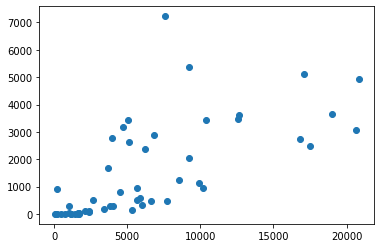

In [101]:
plt.scatter(white_count,african_american_count)

In [102]:
dist_df = data_df.loc[data_df['Indicator']=='Distribution of COVID-19 deaths (%)',:]

In [103]:
dist_df = dist_df.fillna(0)

In [104]:
dist_df = dist_df.loc[dist_df['State']!='United States',:]

In [105]:
white_dist = dist_df.iloc[:,5]
african_american_dist = dist_df.iloc[:,6]
american_indian_dist = dist_df.iloc[:,7]
asian_dist = dist_df.iloc[:,8]
hawai_dist = dist_df.iloc[:,9]
hispanic_dist = dist_df.iloc[:,10]
other_dist = dist_df.iloc[:,11]

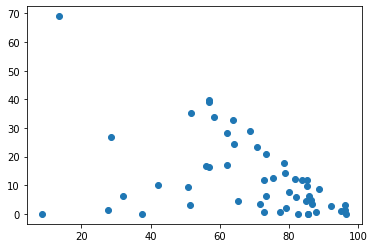

In [106]:
plt.scatter(white_dist,african_american_dist)

In [107]:
dist_df.head()

,Data as of,Start Date,End Date,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic or Latino,Other,Footnote
5,03/24/2021,01/01/2020,03/20/2021,Alabama,Distribution of COVID-19 deaths (%),68.6,28.8,0.2,0.5,0.0,1.8,0.2,One or more data cells have counts between 1-9...
9,03/24/2021,01/01/2020,03/20/2021,Alaska,Distribution of COVID-19 deaths (%),37.4,0.0,36.0,10.8,5.4,3.7,4.0,One or more data cells have counts between 1-9...
13,03/24/2021,01/01/2020,03/20/2021,Arizona,Distribution of COVID-19 deaths (%),51.3,3.2,10.3,2.1,0.2,31.0,1.9,0
17,03/24/2021,01/01/2020,03/20/2021,Arkansas,Distribution of COVID-19 deaths (%),78.9,14.4,0.6,0.8,1.0,3.9,0.4,0
21,03/24/2021,01/01/2020,03/20/2021,California,Distribution of COVID-19 deaths (%),32.1,6.2,0.5,12.6,0.5,47.3,0.8,0


Text(0, 0.5, 'Dist. of Hispanic/Latino % of COVID-19 Deaths')

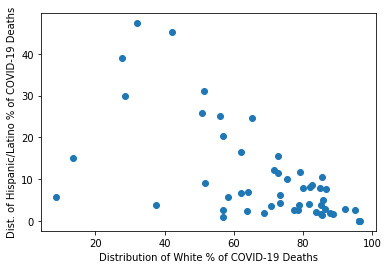

In [108]:
plt.scatter(white_dist,hispanic_dist)
plt.xlabel("Distribution of White % of COVID-19 Deaths")
plt.ylabel("Dist. of Hispanic/Latino % of COVID-19 Deaths")

In [109]:
try_df= count_df.copy()

In [110]:
try_df.set_index('State')

,Data as of,Start Date,End Date,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic or Latino,Other,Footnote
State,,,,,,,,,,,,
Alabama,03/24/2021,01/01/2020,03/20/2021,Count of COVID-19 deaths,6818.0,2869.0,16.0,45.0,0.0,181.0,16.0,One or more data cells have counts between 1-9...
Alaska,03/24/2021,01/01/2020,03/20/2021,Count of COVID-19 deaths,111.0,0.0,107.0,32.0,16.0,11.0,12.0,One or more data cells have counts between 1-9...
Arizona,03/24/2021,01/01/2020,03/20/2021,Count of COVID-19 deaths,7736.0,481.0,1555.0,313.0,35.0,4678.0,292.0,0
Arkansas,03/24/2021,01/01/2020,03/20/2021,Count of COVID-19 deaths,4483.0,816.0,36.0,46.0,56.0,221.0,24.0,0
California,03/24/2021,01/01/2020,03/20/2021,Count of COVID-19 deaths,18987.0,3651.0,273.0,7476.0,315.0,27966.0,462.0,0
Colorado,03/24/2021,01/01/2020,03/20/2021,Count of COVID-19 deaths,4031.0,278.0,83.0,199.0,18.0,1521.0,53.0,0
Connecticut,03/24/2021,01/01/2020,03/20/2021,Count of COVID-19 deaths,5686.0,952.0,0.0,108.0,0.0,752.0,40.0,One or more data cells have counts between 1-9...
Delaware,03/24/2021,01/01/2020,03/20/2021,Count of COVID-19 deaths,998.0,284.0,0.0,13.0,0.0,58.0,0.0,One or more data cells have counts between 1-9...
District of Columbia,03/24/2021,01/01/2020,03/20/2021,Count of COVID-19 deaths,175.0,893.0,0.0,27.0,0.0,194.0,0.0,One or more data cells have counts between 1-9...


In [111]:
states_path = '../stateStuff1.csv'

In [112]:
state_df = pd.read_csv(states_path)

In [113]:
state_df

,Unnamed: 0,Hispanic_orLatino,White_Alone,Black/AfriAmer_Al,AmerIndian&AlaskaNat_alo,Asian_alone,NatHawaiian&PacIs_al,Other,2MoreRaces,Total_Population
0,Mississippi,86507,1768174,1116457,12896,28900,409,25911,35334,2988081
1,Missouri,233046,4995527,697022,24951,106537,6161,67605,147645,6045448
2,Montana,33622,904977,4757,65693,7187,848,5460,25777,1014699
3,Nebraska,186268,1647551,88195,16319,38066,1280,36359,41595,1869365
4,Nevada,770553,1929661,235721,31393,214846,17942,246138,122935,2798636
5,New Hampshire,42141,1241313,17439,2238,31364,228,7273,24346,1324201
6,New Jersey,1688008,6083940,1202300,18335,804989,2808,568215,223826,8904413
7,New Mexico,986972,1524911,43738,190528,28761,1276,226850,68053,2084117
8,New York,3619658,12704637,3070392,74793,1570223,6485,1685765,560879,19673174
9,North Carolina,869908,6839831,2115338,116143,244076,6244,292310,231391,9845333


In [114]:
state_df=state_df.rename(columns={"Unnamed: 0": "State"})

In [115]:
state_df

,State,Hispanic_orLatino,White_Alone,Black/AfriAmer_Al,AmerIndian&AlaskaNat_alo,Asian_alone,NatHawaiian&PacIs_al,Other,2MoreRaces,Total_Population
0,Mississippi,86507,1768174,1116457,12896,28900,409,25911,35334,2988081
1,Missouri,233046,4995527,697022,24951,106537,6161,67605,147645,6045448
2,Montana,33622,904977,4757,65693,7187,848,5460,25777,1014699
3,Nebraska,186268,1647551,88195,16319,38066,1280,36359,41595,1869365
4,Nevada,770553,1929661,235721,31393,214846,17942,246138,122935,2798636
5,New Hampshire,42141,1241313,17439,2238,31364,228,7273,24346,1324201
6,New Jersey,1688008,6083940,1202300,18335,804989,2808,568215,223826,8904413
7,New Mexico,986972,1524911,43738,190528,28761,1276,226850,68053,2084117
8,New York,3619658,12704637,3070392,74793,1570223,6485,1685765,560879,19673174
9,North Carolina,869908,6839831,2115338,116143,244076,6244,292310,231391,9845333


In [116]:
new_df=data_df.merge(state_df,how='outer',on='State')

In [117]:
new_df.fillna(0)

,Data as of,Start Date,End Date,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,...,Footnote,Hispanic_orLatino,White_Alone,Black/AfriAmer_Al,AmerIndian&AlaskaNat_alo,Asian_alone,NatHawaiian&PacIs_al,Other_y,2MoreRaces,Total_Population
0,03/24/2021,01/01/2020,03/20/2021,United States,Count of COVID-19 deaths,320437.0,76608.0,6060.0,20402.0,950.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,03/24/2021,01/01/2020,03/20/2021,United States,Distribution of COVID-19 deaths (%),60.9,14.6,1.2,3.9,0.2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,03/24/2021,01/01/2020,03/20/2021,United States,Unweighted distribution of population (%),60.1,12.5,0.7,5.8,0.2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,03/24/2021,01/01/2020,03/20/2021,United States,Weighted distribution of population (%),39.8,13.2,0.4,10.1,0.2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,03/24/2021,01/01/2020,03/20/2021,Alabama,Count of COVID-19 deaths,6818.0,2869.0,16.0,45.0,0.0,...,One or more data cells have counts between 1-9...,193492.0,3325464.0,1276544.0,23850.0,59599.0,2439.0,61078.0,81646.0,4830620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,03/24/2021,01/01/2020,03/20/2021,Wyoming,Distribution of COVID-19 deaths (%),82.6,0.0,7.4,0.0,0.0,...,One or more data cells have counts between 1-9...,55698.0,527763.0,6142.0,12658.0,5319.0,423.0,11885.0,15489.0,579679.0
210,03/24/2021,01/01/2020,03/20/2021,Wyoming,Unweighted distribution of population (%),83.7,1.1,2.1,1.1,0.1,...,0,55698.0,527763.0,6142.0,12658.0,5319.0,423.0,11885.0,15489.0,579679.0
211,03/24/2021,01/01/2020,03/20/2021,Wyoming,Weighted distribution of population (%),82.7,1.5,1.9,1.0,0.1,...,0,55698.0,527763.0,6142.0,12658.0,5319.0,423.0,11885.0,15489.0,579679.0
212,0,0,0,Puerto Rico,0,0.0,0.0,0.0,0.0,0.0,...,0,3547288.0,2495997.0,301519.0,11775.0,10159.0,129.0,431443.0,332051.0,3583073.0


In [118]:
new_df2=new_df.copy()

In [119]:
new_df2.fillna(0)


,Data as of,Start Date,End Date,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,...,Footnote,Hispanic_orLatino,White_Alone,Black/AfriAmer_Al,AmerIndian&AlaskaNat_alo,Asian_alone,NatHawaiian&PacIs_al,Other_y,2MoreRaces,Total_Population
0,03/24/2021,01/01/2020,03/20/2021,United States,Count of COVID-19 deaths,320437.0,76608.0,6060.0,20402.0,950.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,03/24/2021,01/01/2020,03/20/2021,United States,Distribution of COVID-19 deaths (%),60.9,14.6,1.2,3.9,0.2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,03/24/2021,01/01/2020,03/20/2021,United States,Unweighted distribution of population (%),60.1,12.5,0.7,5.8,0.2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,03/24/2021,01/01/2020,03/20/2021,United States,Weighted distribution of population (%),39.8,13.2,0.4,10.1,0.2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,03/24/2021,01/01/2020,03/20/2021,Alabama,Count of COVID-19 deaths,6818.0,2869.0,16.0,45.0,0.0,...,One or more data cells have counts between 1-9...,193492.0,3325464.0,1276544.0,23850.0,59599.0,2439.0,61078.0,81646.0,4830620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,03/24/2021,01/01/2020,03/20/2021,Wyoming,Distribution of COVID-19 deaths (%),82.6,0.0,7.4,0.0,0.0,...,One or more data cells have counts between 1-9...,55698.0,527763.0,6142.0,12658.0,5319.0,423.0,11885.0,15489.0,579679.0
210,03/24/2021,01/01/2020,03/20/2021,Wyoming,Unweighted distribution of population (%),83.7,1.1,2.1,1.1,0.1,...,0,55698.0,527763.0,6142.0,12658.0,5319.0,423.0,11885.0,15489.0,579679.0
211,03/24/2021,01/01/2020,03/20/2021,Wyoming,Weighted distribution of population (%),82.7,1.5,1.9,1.0,0.1,...,0,55698.0,527763.0,6142.0,12658.0,5319.0,423.0,11885.0,15489.0,579679.0
212,0,0,0,Puerto Rico,0,0.0,0.0,0.0,0.0,0.0,...,0,3547288.0,2495997.0,301519.0,11775.0,10159.0,129.0,431443.0,332051.0,3583073.0


In [120]:
newCount_df = new_df2.loc[new_df2['Indicator']=='Count of COVID-19 deaths',:]

In [121]:
newCount_df=newCount_df.rename(columns={'Non-Hispanic White':'White_Deaths'})

In [122]:
newCount_df

,Data as of,Start Date,End Date,State,Indicator,White_Deaths,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,...,Footnote,Hispanic_orLatino,White_Alone,Black/AfriAmer_Al,AmerIndian&AlaskaNat_alo,Asian_alone,NatHawaiian&PacIs_al,Other_y,2MoreRaces,Total_Population
0,03/24/2021,01/01/2020,03/20/2021,United States,Count of COVID-19 deaths,320437.0,76608.0,6060.0,20402.0,950.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,03/24/2021,01/01/2020,03/20/2021,Alabama,Count of COVID-19 deaths,6818.0,2869.0,16.0,45.0,NaN,...,One or more data cells have counts between 1-9...,193492.0,3325464.0,1276544.0,23850.0,59599.0,2439.0,61078.0,81646.0,4830620.0
8,03/24/2021,01/01/2020,03/20/2021,Alaska,Count of COVID-19 deaths,111.0,NaN,107.0,32.0,16.0,...,One or more data cells have counts between 1-9...,47808.0,484250.0,25022.0,101313.0,42921.0,8841.0,9273.0,61755.0,733375.0
12,03/24/2021,01/01/2020,03/20/2021,Arizona,Count of COVID-19 deaths,7736.0,481.0,1555.0,313.0,35.0,...,NaN,2014711.0,5210335.0,281576.0,294721.0,200090.0,12471.0,430890.0,211845.0,6641928.0
16,03/24/2021,01/01/2020,03/20/2021,Arkansas,Count of COVID-19 deaths,4483.0,816.0,36.0,46.0,56.0,...,NaN,203226.0,2307849.0,459748.0,18409.0,40336.0,6845.0,62484.0,62537.0,2958208.0
20,03/24/2021,01/01/2020,03/20/2021,California,Count of COVID-19 deaths,18987.0,3651.0,273.0,7476.0,315.0,...,NaN,14750686.0,23747013.0,2265387.0,287028.0,5261978.0,150370.0,4974791.0,1734897.0,38421464.0
24,03/24/2021,01/01/2020,03/20/2021,Colorado,Count of COVID-19 deaths,4031.0,278.0,83.0,199.0,18.0,...,NaN,1112586.0,4446095.0,213787.0,50008.0,153467.0,7695.0,224374.0,183480.0,5278906.0
28,03/24/2021,01/01/2020,03/20/2021,Connecticut,Count of COVID-19 deaths,5686.0,952.0,NaN,108.0,NaN,...,One or more data cells have counts between 1-9...,526508.0,2778362.0,370501.0,8908.0,150670.0,981.0,181881.0,101919.0,3593222.0
32,03/24/2021,01/01/2020,03/20/2021,Delaware,Count of COVID-19 deaths,998.0,284.0,NaN,13.0,0.0,...,One or more data cells have counts between 1-9...,80706.0,642623.0,200481.0,3140.0,33643.0,306.0,20995.0,25266.0,926454.0
36,03/24/2021,01/01/2020,03/20/2021,District of Columbia,Count of COVID-19 deaths,175.0,893.0,NaN,27.0,0.0,...,One or more data cells have counts between 1-9...,65803.0,260325.0,316447.0,2154.0,23822.0,250.0,27159.0,17327.0,647484.0


In [123]:
#newCount_df['White_Mortality']=newCount_df.White_Deaths/newCount_df.White_Alone * 100

In [124]:
newCount_df=newCount_df.fillna(0)

In [125]:
newCount_df['White_Mortality']=newCount_df.White_Deaths/newCount_df.White_Alone * 100

In [126]:
newCount_df=newCount_df.rename(columns={'Non-Hispanic Black or African American':'black_Deaths',
                                        'Black/AfriAmer_Al': 'BlackPop',
                                        'Non-Hispanic American Indian or Alaska Native':'AmInd_deaths',
                                        'Non-Hispanic Asian': 'Asian_deaths',
                                        'Non-Hispanic Native Hawaiian or Other Pacific Islander': 'NatHaw_deaths',
                                        'AmerIndian&AlaskaNat_alo': 'AmIndPop',
                                        'NatHawaiian&PacIs_al':'NatHawPop',
                                        'Hispanic or Latino': 'HispanDeaths'})

In [127]:
newCount_df['black_Mortality']=newCount_df.black_Deaths/newCount_df.BlackPop * 100

In [128]:
newCount_df

,Data as of,Start Date,End Date,State,Indicator,White_Deaths,black_Deaths,AmInd_deaths,Asian_deaths,NatHaw_deaths,...,White_Alone,BlackPop,AmIndPop,Asian_alone,NatHawPop,Other_y,2MoreRaces,Total_Population,White_Mortality,black_Mortality
0,03/24/2021,01/01/2020,03/20/2021,United States,Count of COVID-19 deaths,320437.0,76608.0,6060.0,20402.0,950.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inf,inf
4,03/24/2021,01/01/2020,03/20/2021,Alabama,Count of COVID-19 deaths,6818.0,2869.0,16.0,45.0,0.0,...,3325464.0,1276544.0,23850.0,59599.0,2439.0,61078.0,81646.0,4830620.0,0.205024,0.224747
8,03/24/2021,01/01/2020,03/20/2021,Alaska,Count of COVID-19 deaths,111.0,0.0,107.0,32.0,16.0,...,484250.0,25022.0,101313.0,42921.0,8841.0,9273.0,61755.0,733375.0,0.022922,0.000000
12,03/24/2021,01/01/2020,03/20/2021,Arizona,Count of COVID-19 deaths,7736.0,481.0,1555.0,313.0,35.0,...,5210335.0,281576.0,294721.0,200090.0,12471.0,430890.0,211845.0,6641928.0,0.148474,0.170824
16,03/24/2021,01/01/2020,03/20/2021,Arkansas,Count of COVID-19 deaths,4483.0,816.0,36.0,46.0,56.0,...,2307849.0,459748.0,18409.0,40336.0,6845.0,62484.0,62537.0,2958208.0,0.194250,0.177489
20,03/24/2021,01/01/2020,03/20/2021,California,Count of COVID-19 deaths,18987.0,3651.0,273.0,7476.0,315.0,...,23747013.0,2265387.0,287028.0,5261978.0,150370.0,4974791.0,1734897.0,38421464.0,0.079955,0.161165
24,03/24/2021,01/01/2020,03/20/2021,Colorado,Count of COVID-19 deaths,4031.0,278.0,83.0,199.0,18.0,...,4446095.0,213787.0,50008.0,153467.0,7695.0,224374.0,183480.0,5278906.0,0.090664,0.130036
28,03/24/2021,01/01/2020,03/20/2021,Connecticut,Count of COVID-19 deaths,5686.0,952.0,0.0,108.0,0.0,...,2778362.0,370501.0,8908.0,150670.0,981.0,181881.0,101919.0,3593222.0,0.204653,0.256949
32,03/24/2021,01/01/2020,03/20/2021,Delaware,Count of COVID-19 deaths,998.0,284.0,0.0,13.0,0.0,...,642623.0,200481.0,3140.0,33643.0,306.0,20995.0,25266.0,926454.0,0.155301,0.141659
36,03/24/2021,01/01/2020,03/20/2021,District of Columbia,Count of COVID-19 deaths,175.0,893.0,0.0,27.0,0.0,...,260325.0,316447.0,2154.0,23822.0,250.0,27159.0,17327.0,647484.0,0.067224,0.282196


In [129]:
bMortal = newCount_df.loc[:,'black_Mortality']

In [130]:
bMortal

0           inf
4      0.224747
8      0.000000
12     0.170824
16     0.177489
20     0.161165
24     0.130036
28     0.256949
32     0.141659
36     0.282196
40     0.161426
44     0.173375
48     0.000000
52     0.000000
56     0.187692
60          inf
64     0.159529
68     0.163300
72     0.167707
76     0.232288
80     0.073153
84     0.182190
88     0.200022
92     0.247649
96     0.113645
100    0.249360
104    0.175748
108    0.210217
112    0.111117
116    0.213812
120    0.063077
124    0.299426
128    0.100599
132    0.089500
136         inf
140    0.079798
144    0.084232
148    0.175349
152    0.176616
156    0.057663
160    0.218795
164    0.168515
168    0.199003
172    0.000000
176    0.188897
180    0.156839
184    0.059544
188    0.000000
192    0.148426
196    0.064370
200    0.125475
204    0.135812
208    0.000000
Name: black_Mortality, dtype: float64

In [131]:
wMortal = newCount_df.loc[:,'White_Mortality']

In [132]:
wMortal

0           inf
4      0.205024
8      0.022922
12     0.148474
16     0.194250
20     0.079955
24     0.090664
28     0.204653
32     0.155301
36     0.067224
40     0.114452
44     0.153476
48     0.010359
52     0.111672
56     0.135395
60          inf
64     0.188437
68     0.156660
72     0.152171
76     0.173813
80     0.061805
84     0.137701
88     0.190333
92     0.132914
96     0.131639
100    0.224639
104    0.171093
108    0.130832
112    0.143971
116    0.138781
120    0.094255
124    0.208007
128    0.067283
132    0.132235
136         inf
140    0.054285
144    0.223990
148    0.183491
152    0.201543
156    0.051089
160    0.198089
164    0.247760
168    0.158875
172    0.235108
176    0.181822
180    0.104857
184    0.064172
188    0.032972
192    0.109532
196    0.063413
200    0.138318
204    0.133558
208    0.095497
Name: White_Mortality, dtype: float64

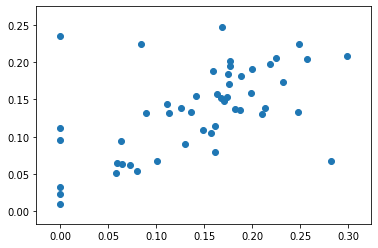

In [133]:
plt.scatter(bMortal,wMortal)

In [134]:
newCount_df=newCount_df.drop(0,axis=0)

In [135]:
newCount_df=newCount_df.drop(60,axis=0)

In [136]:
newCount_df=newCount_df.drop(136,axis=0)

In [137]:
newCount_df

,Data as of,Start Date,End Date,State,Indicator,White_Deaths,black_Deaths,AmInd_deaths,Asian_deaths,NatHaw_deaths,...,White_Alone,BlackPop,AmIndPop,Asian_alone,NatHawPop,Other_y,2MoreRaces,Total_Population,White_Mortality,black_Mortality
4,03/24/2021,01/01/2020,03/20/2021,Alabama,Count of COVID-19 deaths,6818.0,2869.0,16.0,45.0,0.0,...,3325464.0,1276544.0,23850.0,59599.0,2439.0,61078.0,81646.0,4830620.0,0.205024,0.224747
8,03/24/2021,01/01/2020,03/20/2021,Alaska,Count of COVID-19 deaths,111.0,0.0,107.0,32.0,16.0,...,484250.0,25022.0,101313.0,42921.0,8841.0,9273.0,61755.0,733375.0,0.022922,0.000000
12,03/24/2021,01/01/2020,03/20/2021,Arizona,Count of COVID-19 deaths,7736.0,481.0,1555.0,313.0,35.0,...,5210335.0,281576.0,294721.0,200090.0,12471.0,430890.0,211845.0,6641928.0,0.148474,0.170824
16,03/24/2021,01/01/2020,03/20/2021,Arkansas,Count of COVID-19 deaths,4483.0,816.0,36.0,46.0,56.0,...,2307849.0,459748.0,18409.0,40336.0,6845.0,62484.0,62537.0,2958208.0,0.194250,0.177489
20,03/24/2021,01/01/2020,03/20/2021,California,Count of COVID-19 deaths,18987.0,3651.0,273.0,7476.0,315.0,...,23747013.0,2265387.0,287028.0,5261978.0,150370.0,4974791.0,1734897.0,38421464.0,0.079955,0.161165
24,03/24/2021,01/01/2020,03/20/2021,Colorado,Count of COVID-19 deaths,4031.0,278.0,83.0,199.0,18.0,...,4446095.0,213787.0,50008.0,153467.0,7695.0,224374.0,183480.0,5278906.0,0.090664,0.130036
28,03/24/2021,01/01/2020,03/20/2021,Connecticut,Count of COVID-19 deaths,5686.0,952.0,0.0,108.0,0.0,...,2778362.0,370501.0,8908.0,150670.0,981.0,181881.0,101919.0,3593222.0,0.204653,0.256949
32,03/24/2021,01/01/2020,03/20/2021,Delaware,Count of COVID-19 deaths,998.0,284.0,0.0,13.0,0.0,...,642623.0,200481.0,3140.0,33643.0,306.0,20995.0,25266.0,926454.0,0.155301,0.141659
36,03/24/2021,01/01/2020,03/20/2021,District of Columbia,Count of COVID-19 deaths,175.0,893.0,0.0,27.0,0.0,...,260325.0,316447.0,2154.0,23822.0,250.0,27159.0,17327.0,647484.0,0.067224,0.282196
40,03/24/2021,01/01/2020,03/20/2021,Florida,Count of COVID-19 deaths,17093.0,5119.0,44.0,447.0,11.0,...,14934702.0,3171108.0,54569.0,509085.0,11024.0,493202.0,472082.0,19645772.0,0.114452,0.161426


In [138]:
wMorMean=newCount_df['White_Mortality'].mean()

In [139]:
bMorMean=newCount_df['black_Mortality'].mean()

In [140]:
xs= [1,3]
bars = [wMorMean,bMorMean]

<BarContainer object of 2 artists>

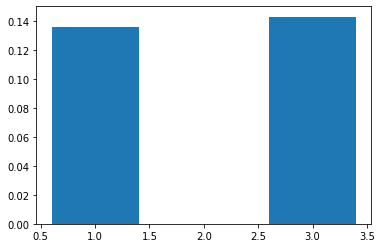

In [141]:
plt.bar(xs,bars)

In [142]:
newCount_df['AmerIndMort']=newCount_df.AmInd_deaths/newCount_df.AmIndPop * 100

In [143]:
newCount_df['AsianMort']=newCount_df.Asian_deaths/newCount_df.Asian_alone *100

In [144]:
newCount_df['NatHawMort']=newCount_df.NatHaw_deaths/newCount_df.NatHawPop *100

In [145]:
newCount_df['hispMort']=newCount_df.HispanDeaths/newCount_df.Hispanic_orLatino * 100

In [146]:
del newCount_df['Data as of']

In [147]:
del newCount_df['Start Date']

In [148]:
del newCount_df['Indicator']

In [149]:
newCount_df.head()

,End Date,State,White_Deaths,black_Deaths,AmInd_deaths,Asian_deaths,NatHaw_deaths,HispanDeaths,Other_x,Footnote,...,NatHawPop,Other_y,2MoreRaces,Total_Population,White_Mortality,black_Mortality,AmerIndMort,AsianMort,NatHawMort,hispMort
4,03/20/2021,Alabama,6818.0,2869.0,16.0,45.0,0.0,181.0,16.0,One or more data cells have counts between 1-9...,...,2439.0,61078.0,81646.0,4830620.0,0.205024,0.224747,0.067086,0.075505,0.000000,0.093544
8,03/20/2021,Alaska,111.0,0.0,107.0,32.0,16.0,11.0,12.0,One or more data cells have counts between 1-9...,...,8841.0,9273.0,61755.0,733375.0,0.022922,0.000000,0.105613,0.074556,0.180975,0.023009
12,03/20/2021,Arizona,7736.0,481.0,1555.0,313.0,35.0,4678.0,292.0,0,...,12471.0,430890.0,211845.0,6641928.0,0.148474,0.170824,0.527618,0.156430,0.280651,0.232192
16,03/20/2021,Arkansas,4483.0,816.0,36.0,46.0,56.0,221.0,24.0,0,...,6845.0,62484.0,62537.0,2958208.0,0.194250,0.177489,0.195557,0.114042,0.818115,0.108746
20,03/20/2021,California,18987.0,3651.0,273.0,7476.0,315.0,27966.0,462.0,0,...,150370.0,4974791.0,1734897.0,38421464.0,0.079955,0.161165,0.095113,0.142076,0.209483,0.189591


In [150]:
hisMortAvg=newCount_df['hispMort'].mean()
print(hisMortAvg)

0.11012382763828109


In [151]:
natMortAv = newCount_df['NatHawMort'].mean()
print(natMortAv)

0.08414111197815038


In [152]:
asianMortav = newCount_df['AsianMort'].mean()
print(asianMortav)

0.08571332575149652


In [153]:
amerInmortAv = newCount_df['AmerIndMort'].mean()
print(amerInmortAv)

0.15407380359074588


In [154]:
print(bMorMean)

0.14318462435245527


In [155]:
print(wMorMean)

0.13617525817847784


In [156]:
selectCount = newCount_df.copy()
selectCount = selectCount.loc[(selectCount['State']=='California' )| (selectCount['State']=='New York') | (selectCount['State']=='Texas') |( selectCount['State']=='Florida') | (selectCount['State']=='Illinois') | (selectCount['State']=='Georgia') | (selectCount['State']=='Ohio'), :]

In [157]:
selectCount

,End Date,State,White_Deaths,black_Deaths,AmInd_deaths,Asian_deaths,NatHaw_deaths,HispanDeaths,Other_x,Footnote,...,NatHawPop,Other_y,2MoreRaces,Total_Population,White_Mortality,black_Mortality,AmerIndMort,AsianMort,NatHawMort,hispMort
20,03/20/2021,California,18987.0,3651.0,273.0,7476.0,315.0,27966.0,462.0,0,...,150370.0,4974791.0,1734897.0,38421464.0,0.079955,0.161165,0.095113,0.142076,0.209483,0.189591
40,03/20/2021,Florida,17093.0,5119.0,44.0,447.0,11.0,7681.0,97.0,0,...,11024.0,493202.0,472082.0,19645772.0,0.114452,0.161426,0.080632,0.087805,0.099782,0.164802
44,03/20/2021,Georgia,9248.0,5369.0,11.0,315.0,0.0,898.0,19.0,One or more data cells have counts between 1-9...,...,4704.0,279403.0,213803.0,10006693.0,0.153476,0.173375,0.042492,0.087391,0.000000,0.098129
56,03/20/2021,Illinois,12609.0,3465.0,16.0,749.0,0.0,3338.0,106.0,One or more data cells have counts between 1-9...,...,3407.0,747933.0,289537.0,12873761.0,0.135395,0.187692,0.056412,0.116009,0.000000,0.157242
132,03/20/2021,New York,16800.0,2748.0,53.0,719.0,0.0,2644.0,112.0,One or more data cells have counts between 1-9...,...,6485.0,1685765.0,560879.0,19673174.0,0.132235,0.089500,0.070862,0.045790,0.000000,0.073046
148,03/20/2021,Ohio,17502.0,2476.0,12.0,179.0,0.0,353.0,25.0,One or more data cells have counts between 1-9...,...,3060.0,97516.0,287212.0,11575977.0,0.183491,0.175349,0.055437,0.082805,0.000000,0.090288
180,03/20/2021,Texas,20840.0,4945.0,89.0,1015.0,28.0,22386.0,82.0,0,...,21655.0,1585866.0,653062.0,26538614.0,0.104857,0.156839,0.070360,0.090302,0.129300,0.219549


<BarContainer object of 7 artists>

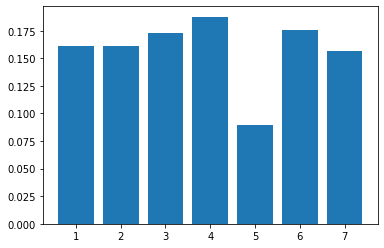

In [158]:
xss = [1,2,3,4,5,6,7]
plt.bar(xss,selectCount.black_Mortality)

In [159]:
caliMort = selectCount.loc[selectCount['State']=='California',:]

In [160]:
listt = [caliMort.White_Mortality, caliMort.black_Mortality, caliMort.AmerIndMort, caliMort.AsianMort, caliMort.NatHawMort, caliMort.hispMort]
newn = [1,2,3,4,5,6]

In [161]:
caliTry = caliMort.iloc[:,[14,15,16,17,18,19]]

In [162]:
caliTry=caliTry.transpose()
caliTry=caliTry.rename(columns={20: "ugh"})
caliTry

,ugh
Asian_alone,5.261978e+06
NatHawPop,1.503700e+05
Other_y,4.974791e+06
2MoreRaces,1.734897e+06
Total_Population,3.842146e+07
White_Mortality,7.995532e-02


([<matplotlib.axis.XTick at 0x7f8cb0a0c4a8>,
 <a list of 6 Text xticklabel objects>)

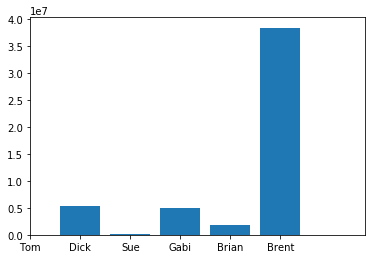

In [163]:

plt.bar(newn,caliTry.ugh)
plt.xticks(np.arange(6), ['Tom', 'Dick', 'Sue','Gabi','Brian', 'Brent'])  # Set text labels.

In [164]:
plt.figure(1)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [165]:
t=np.arange(0,7)

([<matplotlib.axis.XTick at 0x7f8cb206fb00>,
 <a list of 7 Text xticklabel objects>)

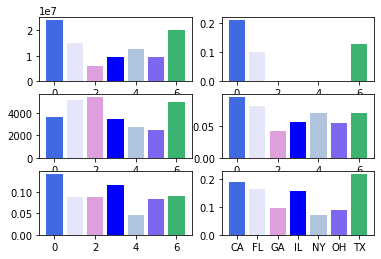

In [166]:
fig,axs = plt.subplots(3,2)

axs[0,0].bar(t,selectCount.White_Alone, color = ['royalblue', 'lavender','plum','blue','lightsteelblue','mediumslateblue','mediumseagreen', 'cornflowerblue'])
plt.subplot
axs[1,0].bar(t,selectCount.black_Deaths, color = ['royalblue', 'lavender','plum','blue','lightsteelblue','mediumslateblue','mediumseagreen', 'cornflowerblue'])
axs[2,0].bar(t,selectCount.AsianMort, color = ['royalblue', 'lavender','plum','blue','lightsteelblue','mediumslateblue','mediumseagreen', 'cornflowerblue'])
plt.xticks(np.arange(7), ['CA', 'FL','GA','IL','NY','OH', 'TX'])

axs[0,1].bar(t,selectCount.NatHawMort, color = ['royalblue', 'lavender','plum','blue','lightsteelblue','mediumslateblue','mediumseagreen', 'cornflowerblue'])
axs[1,1].bar(t,selectCount.AmerIndMort, color = ['royalblue', 'lavender','plum','blue','lightsteelblue','mediumslateblue','mediumseagreen', 'cornflowerblue'])
plt.xticks([])
axs[2,1].bar(t,selectCount.hispMort, color = ['royalblue', 'lavender','plum','blue','lightsteelblue','mediumslateblue','mediumseagreen', 'cornflowerblue'])
plt.xticks(np.arange(7), ['CA', 'FL','GA','IL','NY','OH', 'TX'])

In [167]:
len(selectCount.black_Mortality)

7

In [168]:
len(xs)

2

In [169]:
len(t)

7

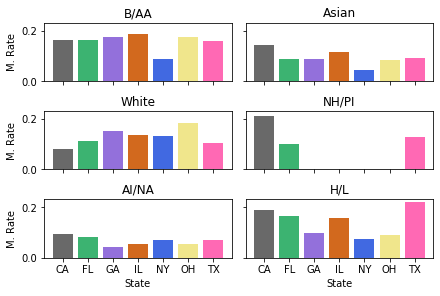

In [177]:
fig1, f1_axes = plt.subplots(ncols=2, nrows=3, constrained_layout=True, sharex=True, sharey=True)
f1_axes[0,0].bar(t,selectCount.black_Mortality, color = ['dimgrey','mediumseagreen','mediumpurple','chocolate','royalblue','khaki','hotpink'])
f1_axes[0,0].set_title('B/AA')

f1_axes[1,0].bar(t,selectCount.White_Mortality, color = ['dimgrey','mediumseagreen','mediumpurple','chocolate','royalblue','khaki','hotpink'])
f1_axes[1,0].set_title('White')

f1_axes[2,0].bar(t,selectCount.AmerIndMort, color = ['dimgrey','mediumseagreen','mediumpurple','chocolate','royalblue','khaki','hotpink'])
f1_axes[2,0].set_title('AI/NA')

plt.xticks(np.arange(7), ['CA', 'FL','GA','IL','NY','OH', 'TX'])
f1_axes[0,1].bar(t,selectCount.AsianMort, color = ['dimgrey','mediumseagreen','mediumpurple','chocolate','royalblue','khaki','hotpink'])
f1_axes[0,1].set_title('Asian')

f1_axes[1,1].bar(t,selectCount.NatHawMort, color = ['dimgrey','mediumseagreen','mediumpurple','chocolate','royalblue','khaki','hotpink'])
f1_axes[1,1].set_title('NH/PI')

f1_axes[2,1].bar(t,selectCount.hispMort, color = ['dimgrey','mediumseagreen','mediumpurple','chocolate','royalblue','khaki','hotpink'])
f1_axes[2,1].set_title('H/L')

plt.xticks(np.arange(7), ['CA', 'FL','GA','IL','NY','OH', 'TX'])

for ax in f1_axes.flat:
    ax.set(xlabel='State', ylabel='M. Rate')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in f1_axes.flat:
    ax.label_outer()
plt.savefig("demographics.png")